In [9]:
import numpy as np 
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


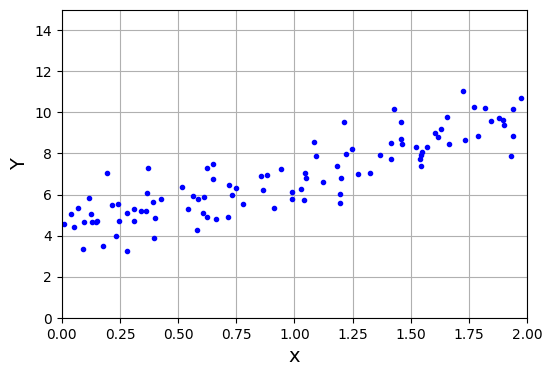

In [11]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m,1)
y = 4 + 3 * x + np.random.randn(m,1)
plt.figure(figsize=(6,4))
plt.plot(x,y, "b.")
plt.grid()
plt.axis([0, 2, 0, 15])
plt.xlabel("x")
plt.ylabel("Y")
plt.show()

### Normal Equtaion

In [12]:
from sklearn.preprocessing import add_dummy_feature

x_b = add_dummy_feature(x)
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [13]:
x_new = np.array([[0], [2]])
x_new_b = add_dummy_feature(x_new)
y_predict = x_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

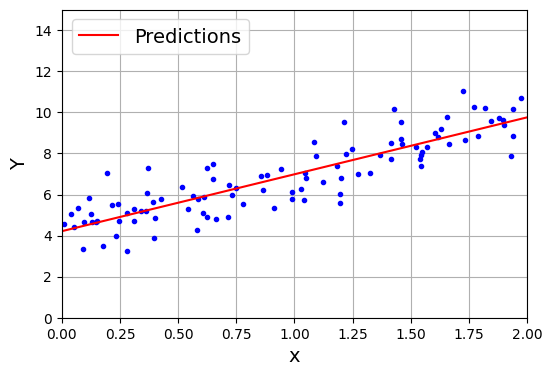

In [15]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m,1)
y = 4 + 3 * x + np.random.randn(m,1)
plt.figure(figsize=(6,4))
plt.plot(x,y, "b.")
plt.plot(x_new, y_predict, "r-", label="Predictions")
plt.grid()
plt.axis([0, 2, 0, 15])
plt.xlabel("x")
plt.ylabel("Y")
plt.legend(loc="upper left")
plt.show()

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x,y)
reg.intercept_, reg.coef_

(array([4.21509616]), array([[2.77011339]]))

# Gradient Descent



## Batch Gradient Descent



Using the full data at each iteration

In [18]:
eta = 0.1
n_epochs = 1000
m = len(x_b)
np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2/m * x_b.T @ (x_b @ theta - y )
    theta = theta - eta * gradients
theta 

array([[4.21509616],
       [2.77011339]])

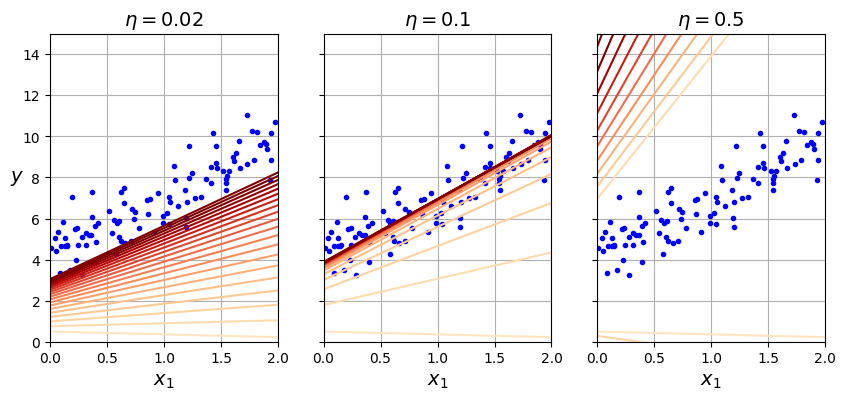

In [21]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(x_b)
    plt.plot(x, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = x_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(x_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * x_b.T @ (x_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent

The  main  problem  with  batch  gradient  descent  is  the  fact  that  it  uses the  whole training  set  to  compute  the  gradients  at  every  step,  which makes  it  very  slow  when the  training  set  is  large.  At  the  opposite extreme,  stochastic  gradient  descent  picks  a random  instance  in  the training  set  at  every  step  and  computes  the  gradients  based only on that single instance. Obviously, working on a single instance at a time makes the algorithm  much  faster  because  it  has  very  little  data  to  manipulate  at  every iteration.  It  also  makes  it  possible  to  train  on  huge  training sets,  since  only  one instance needs to be in memory at each iteration

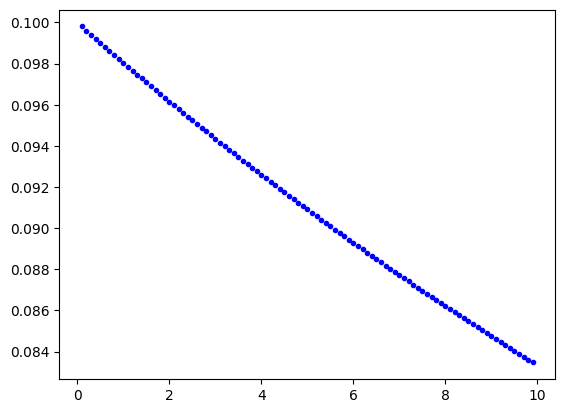

In [23]:
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

dummy_x = np.arange(0.1, 10, 0.1)
plt.plot(dummy_x, learning_schedule(dummy_x), "b.")
plt.show()

In [25]:
n_epochs = 50
np.random.seed(42)
thata = np.random.randn(2,1)
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
theta

array([[4.21076011],
       [2.74856079]])

### Stochastic GD with Sklearn

In [26]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd.fit(x, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd.intercept_, sgd.coef_


(array([4.21278812]), array([2.77270267]))

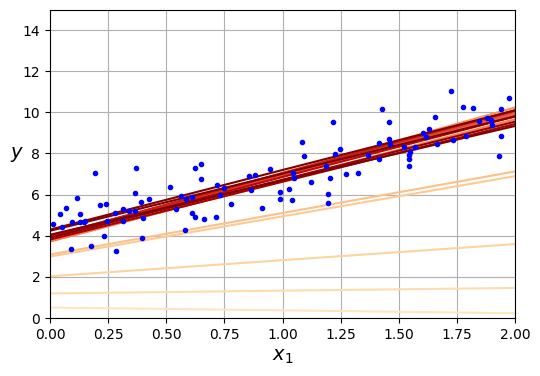

In [30]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = x_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(x_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = x_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(x, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

## Mini-Batch Gradient Descent

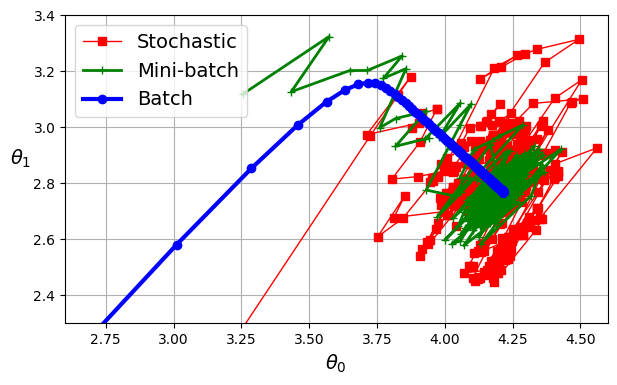

In [31]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

# Polynomial Regression

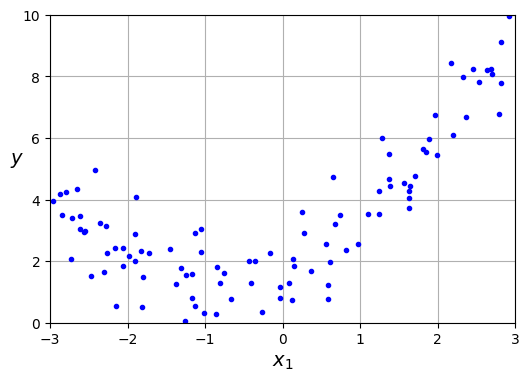

In [32]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) # squaring each elements
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

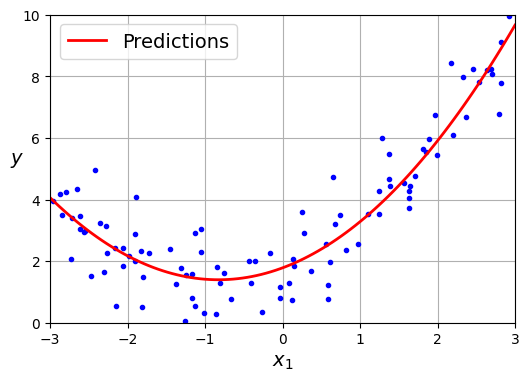

In [36]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

# learning Curves